## Estimating a parameter of the uniform distribution using the maximum likelihood method and the method of moments
Consider the uniform distribution $X \sim U(0, \theta)$. <br>
Let us derive the Maximum Likelihood (ML) and Method-of-Moments (MM) estimators of $\theta$. For that, recall the probability density function (PDF) of the uniform distribution: 

$$
f(x)=
\begin{cases}
\dfrac{1}{\theta} & \quad \text{if $0 < x < \theta$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$


### 1. ML estimator
$\hat{\theta}_{ML} = \underset{\theta}{\operatorname{\argmax}} L(\theta|x_1, ..., x_n)$, where $L(\theta|x_1, ..., x_n)= \prod_{i=1}^{n} f(x_i|\theta)$.<br>

1) If $\exists$ $x_j$ s.t. $ x_j > \theta$, then $f(x_i) = 0$ and $L(\theta|x_1, ..., x_n) = 0$.
2) Thefore, to maximize $L(\theta|x_1, ..., x_n)$, $\hat{\theta}_{ML}$ must be $\geq max\{x_1, ..., x_n\}$.

$f(x|\theta)$ decreases as $\theta$ increases, so we conclude that $\hat{\theta}_{ML} = max\{x_{1}, ..., x_{n}\}$

### 2. MM estimator
$E(X) = \int_{-\infty}^{+\infty} x * f(x) \mathrm{d}x =\int_{0}^{\theta} x * \dfrac{1}{\theta} \mathrm{d}x = \dfrac{\theta}{2}$

According to the method of moments, the theoretical moment $j$ evaluated at $\theta_{MM}$ is equal to the sample moment $j$:<br>
$\dfrac{\hat{\theta}_{MM}}{2} = \bar{X}$<br>

Therefore, $\hat{\theta}_{MM} = 2 \bar{X}$

### Imports

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('poster')

### Solver class and functions

In [2]:
class Solver:
    def __init__(self, n: int, m: int = 10_000, true_theta: float = 1.0, random_seed: int = 2023):
        self.n = n
        self.m = m
        self.true_theta = true_theta
        self.random_seed = random_seed
        numpy.random.seed(random_seed)

        self.u_samples: list = None
        self.theta_estimates: dict = None
        self.estimate_properties: dict = None

    @staticmethod
    def _mle_estimates(samples: list) -> list:
        return [numpy.max(sample) for sample in samples]

    @staticmethod
    def _mm_estimates(samples: list) -> list:
        return [2 * numpy.mean(sample) for sample in samples]

    @staticmethod
    def _estimate_theta(samples: list, method: str) -> list:
        assert method in ['MLE', 'MM'],  f'The method {method} is not supported! Please use "MLE" or "MM".'
        if method == 'MLE':
            return Solver._mle_estimates(samples=samples)
        return Solver._mm_estimates(samples=samples)

    def draw_samples(self, methods: list = ['MLE', 'MM']):
        """
        Use a random number generator to draw 10,000 samples of length n from U(0,𝜃) and compute
        the MLE and MM estimators of 𝜃 for each of the 10,000 samples.
        """
        self.u_samples = [
            numpy.random.uniform(
                low=0.0, high=self.true_theta, size=self.n
            )
            for _ in range(self.m)
        ]
        self.theta_estimates = {
            method: self._estimate_theta(
                samples=self.u_samples, method=method
            )
            for method in methods
        }
        return self.theta_estimates

    def plot_histograms(self, figsize: tuple = (12, 5), stat: str = 'density'):
        """Plot the histograms of the MLE and MM estimators."""
        fig, ax = plt.subplots(1,1, figsize=figsize)
        ax.set_title(f'Sample length = {self.n}')
        sns.histplot(pandas.DataFrame(self.theta_estimates), stat=stat, ax=ax)
        plt.tight_layout()
        return fig

    def compute_estimator_properties(self):
        """
        Compute the mean, bias and standard error of the MLE and MM estimators in the simulated data.
        """
        self.estimate_properties = {}
        for method, estimate_samples in self.theta_estimates.items():
            cur_mean = numpy.mean(estimate_samples)
            self.estimate_properties[method] = {
                'Mean': cur_mean,
                'Bias':  cur_mean - self.true_theta,
                'Standard Error': numpy.var(estimate_samples)**0.5,
            }

        return self.estimate_properties


def mm_theo_variance(true_theta, sample_size):
    return true_theta**2 / (3 * sample_size)

def mle_theo_mean(true_theta, sample_size):
    return sample_size / (sample_size + 1) * true_theta

def mle_theo_variance(true_theta, sample_size):
    return true_theta**2 / ( sample_size * (sample_size + 2) )

Set $\theta = 1$  and use the solver  for $n = 20, 100, 1000$:

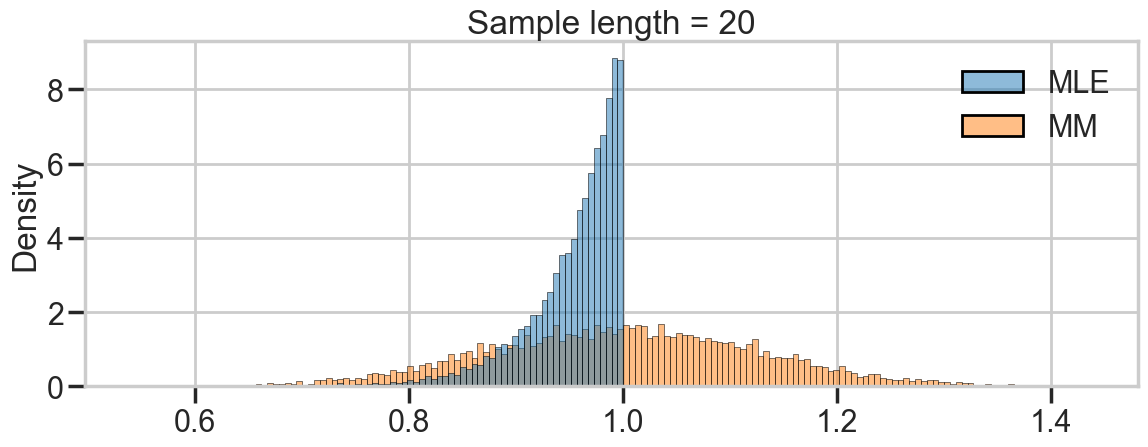

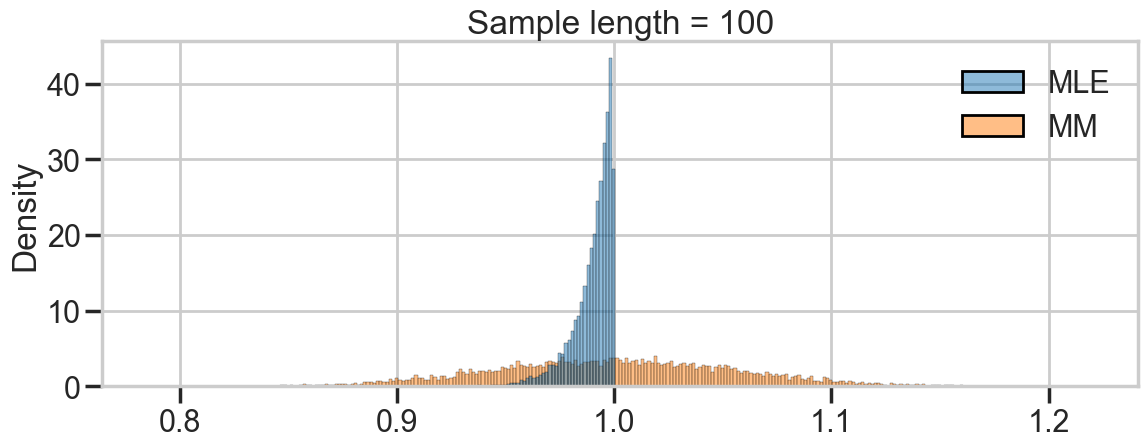

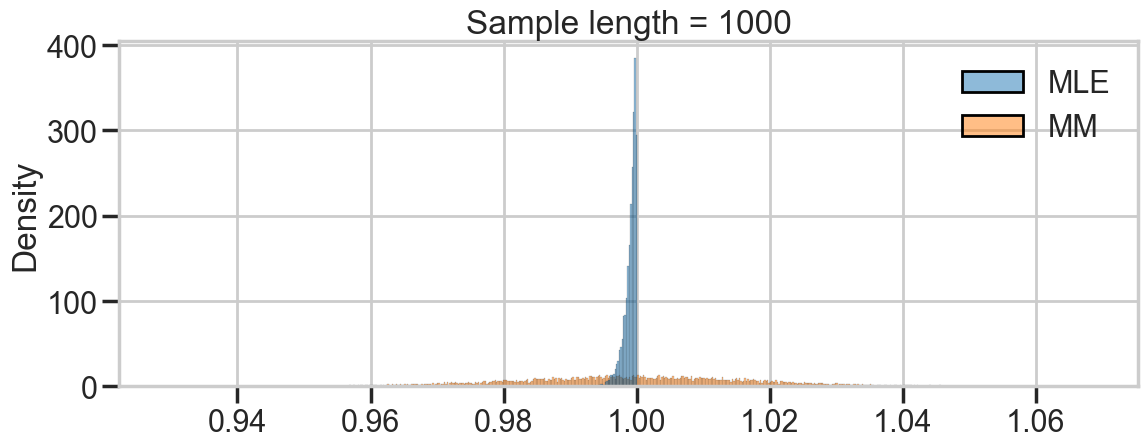

In [3]:
solutions = {}
for n in [20, 100, 1_000]:
    cur_solver = Solver(n=n, m=10_000)
    cur_samples = cur_solver.draw_samples()
    cur_histograms = cur_solver.plot_histograms()
    cur_estimator_properties = cur_solver.compute_estimator_properties()
    solutions[n] = {
        'samples': cur_samples,
        'histograms': cur_histograms,
        'estimator_properties': cur_estimator_properties,
    }

In [4]:
for key in solutions:
    print(f'Sample length = {key}')
    display(pandas.DataFrame(solutions[key]['estimator_properties']))
    print(50*'-')

Sample length = 20


,MLE,MM
Mean,0.952697,1.000162
Bias,-0.047303,0.000162
Standard Error,0.044949,0.128700


--------------------------------------------------
Sample length = 100


,MLE,MM
Mean,0.990168,1.000118
Bias,-0.009832,0.000118
Standard Error,0.009672,0.057816


--------------------------------------------------
Sample length = 1000


,MLE,MM
Mean,0.998997,0.999752
Bias,-0.001003,-0.000248
Standard Error,0.001013,0.018407


--------------------------------------------------


(d) For each $n$, compare the properties of the MLE and MM estimators in these simulations to their theoretical distributions.     
(e) Which properties of the estimators in the simulated data are expected, i.e. close to their theoretical properties, and which ones are not?

In [5]:
true_theta = 1
estimates_theoretical_properties = {}

for n in solutions.keys():
    estimates_theoretical_properties[n] = {
        'MM': {
            'Theoretical Mean': true_theta,
            'Theoretical Standard Error': mm_theo_variance(
                true_theta=true_theta, sample_size=n
            )
        },
        'MLE': {
            'Theoretical Mean': mle_theo_mean(
                true_theta=true_theta, sample_size=n
            ),
            'Theoretical Standard Error': mle_theo_variance(
                true_theta=true_theta, sample_size=n
            )
        }
    }

In [6]:
pandas.DataFrame(estimates_theoretical_properties[20])

,MM,MLE
Theoretical Mean,1.000000,0.952381
Theoretical Standard Error,0.016667,0.002273


In [7]:
pandas.DataFrame(estimates_theoretical_properties[100])

,MM,MLE
Theoretical Mean,1.000000,0.990099
Theoretical Standard Error,0.003333,0.000098


In [8]:
pandas.DataFrame(estimates_theoretical_properties[1_000])

,MM,MLE
Theoretical Mean,1.000000,9.990010e-01
Theoretical Standard Error,0.000333,9.980040e-07


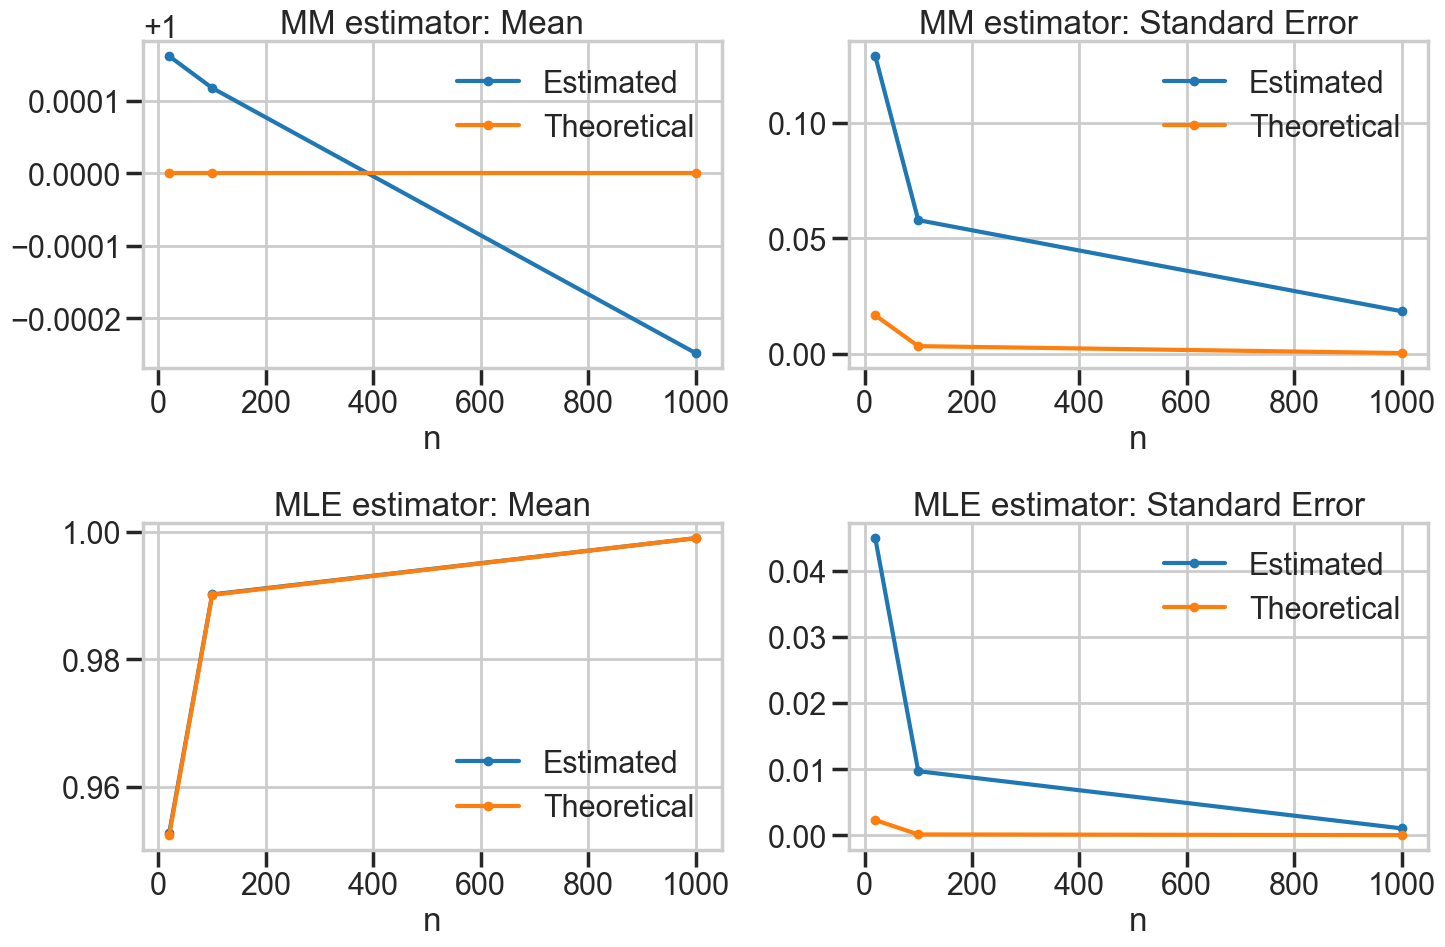

In [9]:
cur_method = 'MM'
cur_property = 'Mean'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

counter = 0
for cur_method in ['MM', 'MLE']:
    for cur_property in ['Mean', 'Standard Error']:
        ax = axes[counter]
        estimated = {
            n: solutions[n]['estimator_properties'][cur_method][cur_property]
            for n in solutions
        }
        theoretical = {
            n: estimates_theoretical_properties[n][cur_method]\
            [f'Theoretical {cur_property}']
            for n in estimates_theoretical_properties
        }
        pandas.DataFrame(
            {'Estimated': estimated, 'Theoretical': theoretical}
        ).plot(ax=ax, marker='.')
        ax.set_title(f'{cur_method} estimator: {cur_property}')
        ax.set_xlabel('n')
        counter += 1
    
plt.tight_layout();

Above we can see that the sample means of estimators are very close to their theoretical values. Note that in the plot of the ML estimator sample and theoretical means overlap, but they are not exactly equal to each other (see below).    
Regardind sample standard errors, they deviate from their theoretical values considerably when $n$ is small. However, as $n$ gets larger, the sample standard errors converge to their theoretical values for both estimators.

In [10]:
{
    n: abs(
        solutions[n]['estimator_properties']['MLE']['Mean'] -\
        estimates_theoretical_properties[n]['MLE']['Theoretical Mean']
    )
    for n in solutions
}

{20: 0.0003164298271545185,
 100: 6.940367147367787e-05,
 1000: 3.6157535506786687e-06}

Also, in the density plots we saw that the distribution of the MM estimator looks roughly normal and centered around 1, while the distribution of the ML estimator resembles the beta distribution with $\beta=1$ and $\alpha$ increasing as the number of obsevations grows. Below I show that $\hat{\theta}_{ML}$ indeed follows the beta distribution when $\theta=1$.

$P(\hat{\theta}_{ML} < x) = P(X_1 < x, ..., X_n < x) = P(X_1 < x) * ... * P(X_n < x) = F^{n}(x)$, where $F(x)$ is the cumulative distribution function (CDF) of the uniform distribution. In this derivation we used that fact that $X_1, ..., X_n$ are i.i.d.<br>
$$
F(x)=
\begin{cases}
\dfrac{x}{\theta} & \quad \text{if $0 < x < \theta$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$
Therefore, the CDF of $\hat{\theta}_{ML}$ is 
$$
F_{\hat{\theta}_{ML}}(y)=
\begin{cases}
\dfrac{y^n}{\theta^n} & \quad \text{if $0 < y < \theta$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$

By calculating the first derivative of $F_{\hat{\theta}_{ML}}(y)$ w.r.t. $y$ at $\theta=1$, we find the PDF of $\hat{\theta}_{ML}$:
$$
f_{\hat{\theta}_{ML}}(y)=
\begin{cases}
ny^{n-1} & \quad \text{if $0 < y < 1$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$

Now, recall the PDF of the beta distribution: $f_{\Beta}(x) = \dfrac{x^{\alpha-1}(1-x)^{\beta-1}}{\Beta(\alpha, \beta)}$.<br>
If $\alpha=n$ and $\beta=1$, $f_{\Beta}(x) = nx^{n-1}$. <br>
This is exactly the PDF of $\hat{\theta}_{ML}$, so we conclude that $\hat{\theta}_{ML} \sim \Beta(n, 1)$.